In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1, as_frame = False) #by deafult it is a dataframe so we have
mnist.keys()#change and use a numpy array

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X , y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

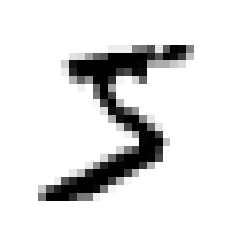

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28) #each image is 28 by 28 pixels
#help(plt)
plt.imshow(some_digit_image, cmap = mpl.cm.binary
, interpolation = "nearest")
plt.axis('off')
plt.show()


In [82]:
import numpy as np
y = y.astype(np.uint8)#labels are strings converting them into numbers '5' to 5


### Creating a test and train set

In [6]:
X_train, X_test , y_train, y_test = X[:60000], X[60000:] , y[:60000] , y[60000:]

In [86]:
# CREATING TARGET VECTORS
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [8]:
#We will use the STOCHASTIC GRADIENT DESCENT
#we are creating a binary classifier , what we are doing here is that we are checking if a digit
# is 5 or no.
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

array([ True])

In [9]:
#making predictions if digit is 5 or not for first 20 values

print("Is the number 5 or not\n Values      Prediction\n")
for k in range(15):
    print("{} = {}".format(y[k], sgd_clf.predict([X[k]]))  )
    
    

Is the number 5 or not
 Values      Prediction

5 = [ True]
0 = [False]
4 = [False]
1 = [False]
9 = [False]
2 = [False]
1 = [False]
3 = [False]
1 = [False]
4 = [False]
3 = [False]
5 = [ True]
3 = [False]
6 = [False]
1 = [False]


### SELECTING THE PERFORMANCE MEASURE

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv =3 , scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [65]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


#### Creating a dumb classifier which only classifies the not 5 class , and still it has very high accuracy, comparing to out old values above , now this means that data set is skewed (one class is much bigger htan other classes) in this case we have not -5 class

In [66]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [67]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [68]:

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv =3)

In [217]:
y_train_pred.shape

(60000,)

#### So we will use a confusion matrix for better evaluation

In [69]:
#USING THE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
#THE COLUMNS REPRESENT THE PREDICTED AND THE ROWS REPRESSENT THE THE ACTUAL VALUES,
#  this is a binary classifier
#using for only value 5


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

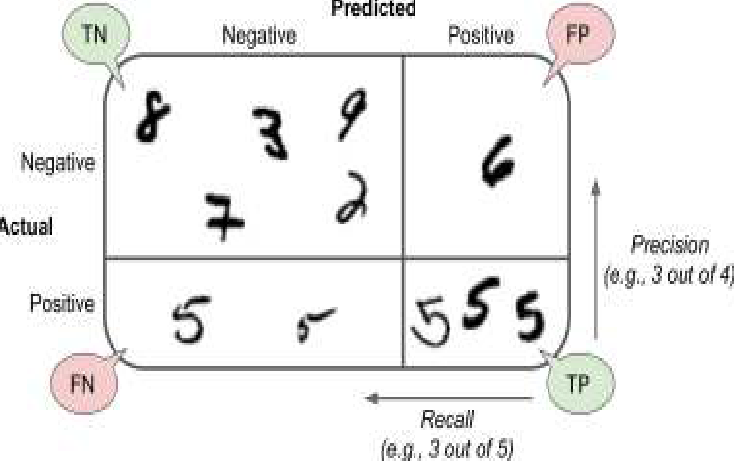

In [109]:
#PRECISION AND RECALL
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [71]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [111]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846
              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



In [113]:
#READING A CLASSIFICATION REPORT, it gives a text summary of the accuracy,precision and f1 scores
#for each class
print(classification_report(y_train_5, y_train_pred))
#support means
#Actual values of not 5s - 54579  and 5s- 5421 , we will look for the true ones

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



#### How sgd makes decisions For each instance, it computes a score based on a decision function,and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class

#### For each instance, it computes a score based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class
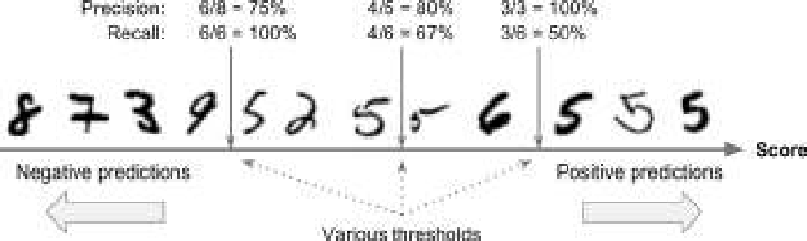
#### Decision threshold and precision / recall tradeoff

In [196]:
y_scores = sgd_clf.decision_function([X[0]])
y_scores
#scikit learn does not allow to see threshold direcly but we can get the decsisionn scores
#LET
threshold = 7500
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

#### Deciding which threshold to use, we will get the scores of all the instances ,specify method as decison_function

In [127]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [128]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

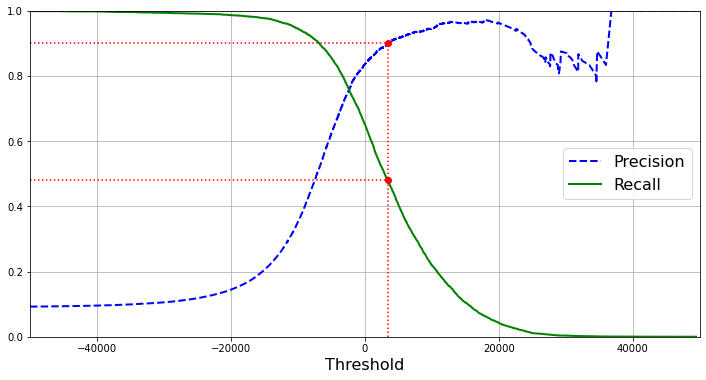

In [130]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(12, 6))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown                                              # Not shown
plt.show()

### Direct plotting precision against recall

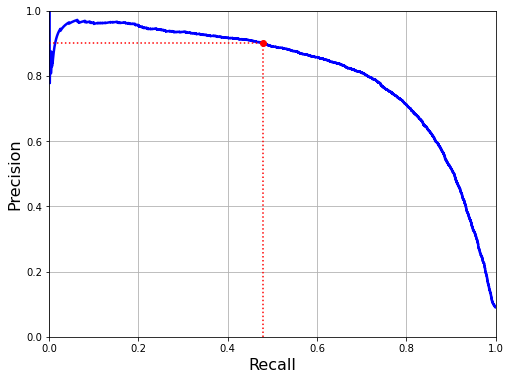

In [135]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2.5)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [159]:
#if we want 90% precision ,  we will need the minimum threshold
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)
y_train_pred_90= (y_scores >= threshold_90_precision)
y_train_pred_90.shape

3370.0194991439557


(60000,)

In [150]:
#NOW INSTEAD OF CALLING THE CLSIIFIER METHOD WE CAN JUST
print(precision_score(y_train_5, y_train_pred_90))
recall_score(y_train_5, y_train_pred_90)
#now we have 90% precision accuracy classifier

0.9000345901072293


0.4799852425751706

In [161]:
from sklearn.metrics import roc_curve
fpr, tpr , thresholds = roc_curve(y_train_5, y_scores)

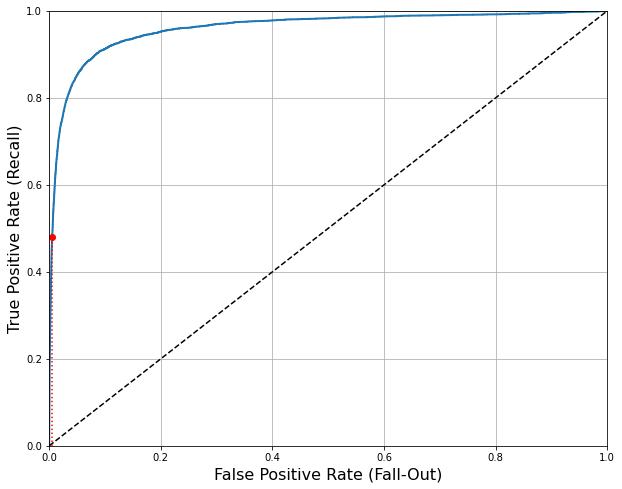

In [188]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(10, 8))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown                                    # Not shown
plt.show()

In [165]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

#### Training a random forest classifier and comparing ROC AUC score to Sgd

In [166]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [183]:
#WE NEED SCORES NOT PROBABILITY
y_scores_forest = y_probas_forest[:,1] #its both +ve and -ve 'probas'
y_scores_forest #score = proba of positive class ONLY

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [186]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

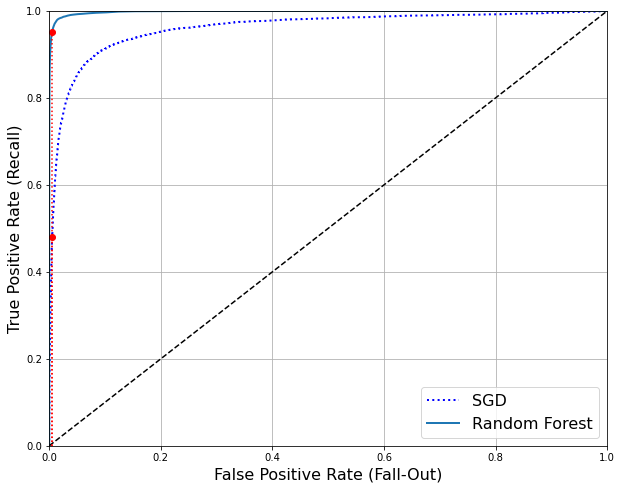

In [193]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [199]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [200]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv =3)

In [201]:
print(classification_report(y_train_5, y_train_pred_forest)) 

              precision    recall  f1-score   support

       False       0.99      1.00      0.99     54579
        True       0.99      0.87      0.92      5421

    accuracy                           0.99     60000
   macro avg       0.99      0.93      0.96     60000
weighted avg       0.99      0.99      0.99     60000



In [203]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

#### MULTICLASS CLASSIFICATION

In [205]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X[0]])

array([3], dtype=uint8)

In [211]:
#scikit learn ran 10 binary classifiers under the hood
some_digit_scores = sgd_clf.decision_function([X[0]])
some_digit_scores.shape

(1, 10)

In [212]:
np.argmax(some_digit_scores)

3

In [213]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [215]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

 #### Following piece of code can take 30 minutes to execute

In [219]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
'''
"""
The idea behind StandardScaler is that it will transform your data such that its distribution will have a
mean value 0 and standard deviation of 1. In case of multivariate data, this is done feature-wise (in other
words independently for each column of the data).Given the distribution of the data, each value in the 
dataset will have the mean value subtracted, and then divided by the standard deviation of the whole
dataset (or feature in the multivariate case).
"""

'\nThe idea behind StandardScaler is that it will transform your data such that its distribution will have a\nmean value 0 and standard deviation of 1. In case of multivariate data, this is done feature-wise (in other\nwords independently for each column of the data).Given the distribution of the data, each value in the \ndataset will have the mean value subtracted, and then divided by the standard deviation of the whole\ndataset (or feature in the multivariate case).\n'

### Analyzing errors

In [247]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [248]:
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]],
      dtype=int64)

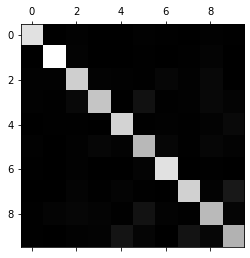

<Figure size 576x576 with 0 Axes>

In [253]:

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.figure(figsize=(8,8))
plt.show()

In [273]:
rows_sum = conf_mx.sum(axis=1, keepdims =True)
norm_conf_mx = conf_mx/rows_sum
print(rows_sum)
norm_conf_mx

[[5923]
 [6742]
 [5958]
 [6131]
 [5842]
 [5421]
 [5918]
 [6265]
 [5851]
 [5949]]


array([[9.51375992e-01, 0.00000000e+00, 1.02988350e-02, 1.68833361e-03,
        2.70133378e-03, 8.44166807e-03, 7.76633463e-03, 1.18183353e-03,
        1.11430019e-02, 5.40266757e-03],
       [4.44971818e-04, 9.48234945e-01, 1.40907743e-02, 3.11480273e-03,
        2.37318303e-03, 6.97122516e-03, 2.22485909e-03, 4.00474637e-03,
        1.61673094e-02, 2.37318303e-03],
       [1.20845921e-02, 9.39912722e-03, 8.68412219e-01, 1.49378986e-02,
        1.15810675e-02, 6.54582075e-03, 2.73581739e-02, 1.10775428e-02,
        3.55824102e-02, 3.02114804e-03],
       [9.46012070e-03, 5.21937694e-03, 3.53938999e-02, 8.05904420e-01,
        3.75142717e-03, 7.19295384e-02, 5.21937694e-03, 9.13390964e-03,
        3.52307943e-02, 1.87571359e-02],
       [1.88291681e-03, 4.45053064e-03, 7.87401575e-03, 1.02704553e-03,
        9.06881205e-01, 4.45053064e-03, 1.24957206e-02, 5.47757617e-03,
        1.48921602e-02, 4.05682985e-02],
       [1.25438111e-02, 4.24275964e-03, 1.06991330e-02, 2.76701716e-02,
   

[[9.51375992e-01 0.00000000e+00 1.02988350e-02 1.68833361e-03
  2.70133378e-03 8.44166807e-03 7.76633463e-03 1.18183353e-03
  1.11430019e-02 5.40266757e-03]
 [4.44971818e-04 9.48234945e-01 1.40907743e-02 3.11480273e-03
  2.37318303e-03 6.97122516e-03 2.22485909e-03 4.00474637e-03
  1.61673094e-02 2.37318303e-03]
 [1.20845921e-02 9.39912722e-03 8.68412219e-01 1.49378986e-02
  1.15810675e-02 6.54582075e-03 2.73581739e-02 1.10775428e-02
  3.55824102e-02 3.02114804e-03]
 [9.46012070e-03 5.21937694e-03 3.53938999e-02 8.05904420e-01
  3.75142717e-03 7.19295384e-02 5.21937694e-03 9.13390964e-03
  3.52307943e-02 1.87571359e-02]
 [1.88291681e-03 4.45053064e-03 7.87401575e-03 1.02704553e-03
  9.06881205e-01 4.45053064e-03 1.24957206e-02 5.47757617e-03
  1.48921602e-02 4.05682985e-02]
 [1.25438111e-02 4.24275964e-03 1.06991330e-02 2.76701716e-02
  1.53108283e-02 8.49658735e-01 3.20973990e-02 4.79616307e-03
  2.80391072e-02 1.49418926e-02]
 [6.75904022e-03 2.19668807e-03 9.46265630e-03 1.01385603e

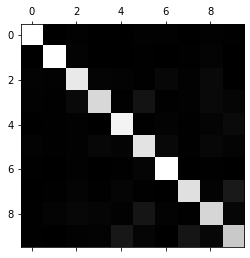

In [274]:
#np.fill_diagonal(norm_conf_mx,0)
print(norm_conf_mx)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

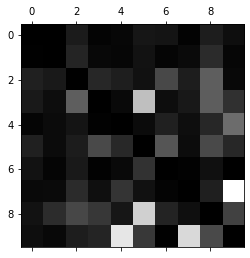

In [275]:
#change diagonal value to zero
np.fill_diagonal(norm_conf_mx,0) #Light represents more intensity
#np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

### Now we can see what features we should work on for example on bottom right seven 7, being predicted as 9, 3 being preedicted as 3, 9 being predicted as 7. We could preprocess the images by identifying some patterns. (Read  book)